In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
points = 20
number_of_states = 2

# Define the system
F = [[0.2, 0.4], [-0.4, 1]]
G = np.array([[0], [1]])
P0 = np.diag([40, 40])

u = np.array([1])
x_0 = np.transpose([10, 20])
Q = np.diag([1, number_of_states])


The system is stable
x_bar =  [2.5 5. ]


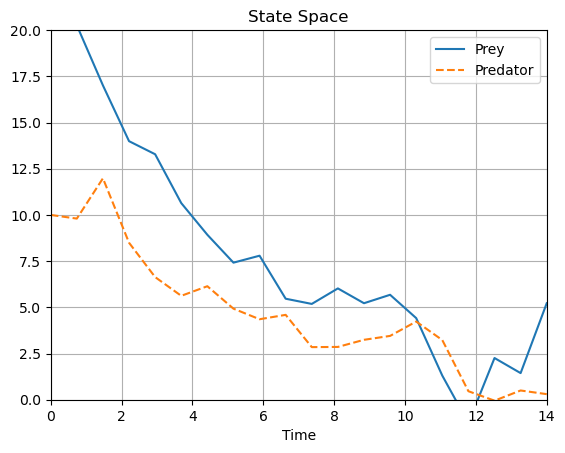

array([[2.8809006 , 3.07621649],
       [3.07621649, 7.95903267]])

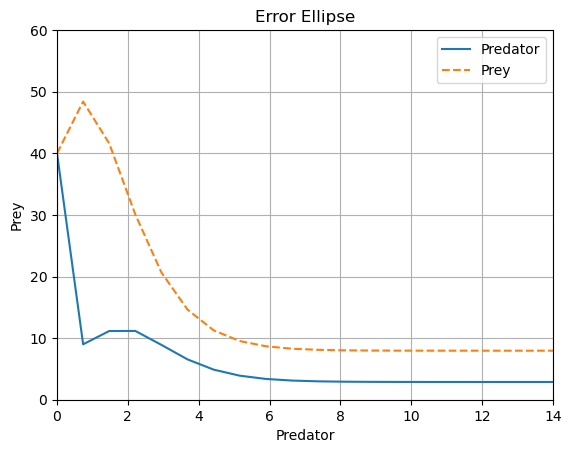

array([[[40.        ,  9.        , 11.152     , 11.1664    ,
          8.8989184 ,  6.54484326,  4.88471081,  3.90124055,
          3.37472044,  3.11099682,  2.98500153,  2.92689705,
          2.90082689,  2.8893837 ,  2.88445021,  2.88235482,
          2.88147605,  2.88111149,  2.88096167,  2.8809006 ],
        [ 0.        , 12.8       , 19.152     , 16.51392   ,
         11.7923328 ,  8.01506304,  5.64828254,  4.34047171,
          3.67200798,  3.34811949,  3.19720139,  3.12894985,
          3.0988038 ,  3.08574103,  3.08016968,  3.07782493,
          3.07684929,  3.07644729,  3.07628307,  3.07621649]],

       [[ 0.        , 12.8       , 19.152     , 16.51392   ,
         11.7923328 ,  8.01506304,  5.64828254,  4.34047171,
          3.67200798,  3.34811949,  3.19720139,  3.12894985,
          3.0988038 ,  3.08574103,  3.08016968,  3.07782493,
          3.07684929,  3.07644729,  3.07628307,  3.07621649],
        [40.        , 48.4       , 41.6       , 30.06272   ,
         20.638208 

In [36]:
def x_and_P_minus(points):
    global x_minus, P_minus
    x_minus = np.zeros((number_of_states, points))
    P_minus = np.zeros((number_of_states, number_of_states, points))
    x_minus[:, 0] = x_0
    P_minus[:, :, 0] = P0
    for i in range(1, points):
        w = np.reshape(np.random.multivariate_normal([0 for i in range(number_of_states)], Q), x_minus[:, 0].shape)
        x_minus[:, i] = F @ x_minus[:, i-1] + G @ u + w
        P_minus[:, :, i] = F @ P_minus[:, :, i-1] @ np.transpose(F) + Q

x_and_P_minus(points)

def F_stable(F):
    global x_bar
    eigvals, _ = np.linalg.eig(F)
    if np.all(np.abs(eigvals) < 1):
        # Calculate the mean (or final values if the system is stable)
        x_bar = np.linalg.inv(np.eye(2)-F) @ G @ u
        print("The system is stable")
        print('x_bar = ', x_bar)
    else:
        raise ValueError("The system is not stable")

F_stable(F)

# Plot the results
plt.plot(np.linspace(0, 14, 20), x_minus[1, :], label='Prey')
plt.plot(np.linspace(0, 14, 20), x_minus[0, :], linestyle='--', label='Predator')
plt.xlabel('Time')
plt.title('State Space')
plt.grid()
plt.ylim(0, 20), plt.xlim(0, 14), plt.legend()
plt.show()

# Obtain P diagonal
P_diag = np.zeros((2, points))
for i in range(points):
    P_diag[:, i] = np.diag(P_minus[:, :, i])

display(P_minus[:, :, -1])
plt.plot(np.linspace(0, 14, 20), P_diag[0, :], label='Predator')
plt.plot(np.linspace(0, 14, 20), P_diag[1, :], linestyle='--', label='Prey')

plt.xlabel('Predator')
plt.ylabel('Prey')
plt.title('Error Ellipse')
plt.grid(), plt.legend()
plt.ylim(0, 60), plt.xlim(0, 14)
plt.show()
display(P_minus)